1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
win = pd.read_csv("data/usuarios_win_mac_lin.csv")
win.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [6]:
win_no1 = win[~(win["clase"] == 1)]
win_no1.clase.value_counts()

0    86
2    44
Name: clase, dtype: int64

In [10]:
X = win_no1.drop("clase", 1)
y = win_no1.clase

/tmp/ipykernel_13117/993273359.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = win_no1.drop("clase", 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

In [30]:
model = LogisticRegression(solver = 'liblinear', random_state = 42)

In [31]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_test.tolist()

[0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0]

In [34]:
y_pred.tolist()

[0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2]

In [35]:
df_pred = pd.DataFrame({"value": y_test, "pred": y_pred})
df_pred["success"] = \
    np.where(
        df_pred["value"] == df_pred["pred"], 
        True, False)

In [36]:
df_pred

,value,pred,success
82,0,0,True
67,0,0,True
37,2,2,True
58,0,0,True
155,0,2,False
83,0,0,True
97,2,2,True
145,0,2,False
121,2,2,True
53,0,0,True


In [37]:
con_fun = confusion_matrix(y_test, y_pred)
con_fun

array([[13,  4],
       [ 0,  9]])

Text(33.0, 0.5, 'actual')

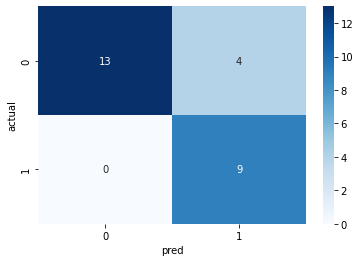

In [43]:
s = sns.heatmap(con_fun, annot = True, cmap = "Blues")
s.set_xlabel("pred")
s.set_ylabel("actual")

In [44]:
print(f"""El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.\n
    Por este motivo para este modelo:\n
    El score es: { model.score(X_test, y_test)} y \n
    el accuracy_score es { accuracy_score(y_test, y_pred)}""")

El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.

    Por este motivo para este modelo:

    El score es: 0.8461538461538461 y 

    el accuracy_score es 0.8461538461538461


**LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.**

In [47]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [88]:
model_grid = LogisticRegression(max_iter = 1000)
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear', 'lbfgs']}

# parámetros cogidos de esta página
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [84]:
clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

In [85]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [86]:
best_clf

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [87]:
print("tuned hyperparameters >> best parameters <<: ", best_clf.best_params_)
print("accuracy:", best_clf.best_score_)

tuned hyperparameters >> best parameters <<:  {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy: 0.961904761904762


In [76]:
best_model = LogisticRegression(
    C = 4.281332398719396, 
    penalty = 'l2', 
    solver = 'liblinear')

In [77]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.43287612810830617, solver='liblinear')

In [78]:
y_pred = best_model.predict(X_test)

In [79]:
y_test.to_list()

[0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0]

In [80]:
y_pred.tolist()

[0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2]

In [81]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [90]:
from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(
    best_model, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), 
    loss = 'mse', num_rounds = 200) 

In [91]:
print("MSE: ", mse)
print("bias: ", bias)
print("variance: ", var)

MSE:  0.6361538461538462
bias:  0.47155769230769234
variance:  0.16459615384615386


In [92]:
mse, bias, var = bias_variance_decomp(
    model, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), 
    loss = 'mse', num_rounds = 200) 

In [93]:
print("MSE: ", mse)
print("bias: ", bias)
print("variance: ", var)

MSE:  0.6146153846153846
bias:  0.48032692307692304
variance:  0.13428846153846152
